# Hello TensorFlow !

Today I started learning about tensorflow. I used the Fashion MNIST dataset to implement the neural network model.

In [13]:
#Importing libraries
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Loading Dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 52s 12us/step


In [8]:
#Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
#Shape of training input
train_images.shape

(60000, 28, 28)

In [10]:
#Shape of testing input
test_images.shape

(10000, 28, 28)

In [11]:
# Process the data before fed to the Neural Net
# Normalizing values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

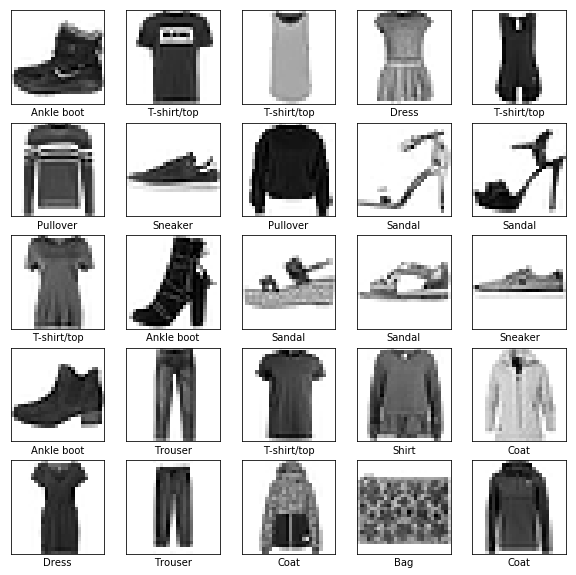

In [14]:
#Visualizing our training data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Building our model

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.4985 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.3761 - acc: 0.8631
Epoch 3/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.3369 - acc: 0.8777
Epoch 4/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.3141 - acc: 0.8832
Epoch 5/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.2959 - acc: 0.8896


We obtained an accuracy of 88.96%

## Let's make some prediction

In [19]:
predictions = model.predict(test_images)

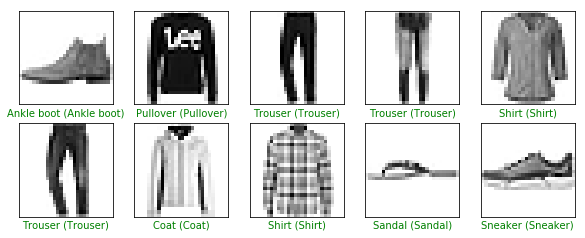

In [24]:
# Visualizing first 10 images with their predicted output
# The text inside the paranthesis represents actual label, 
# while the other representes the predicted label
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]),color=color)